In [1]:
cd Radial-Transformers/

[Errno 2] No such file or directory: 'Radial-Transformers/'
/home-local/akath.nobkp/Radial-Transformers


In [2]:
from PIL import Image
import torch
import torch.nn as nn

/gel/usr/akath/.conda/envs/swin/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from torchvision.transforms import transforms
t2pil = transforms.ToTensor()
pil = transforms.ToPILImage()

In [4]:
import numpy as np

In [6]:
from utils import get_sample_params_from_subdiv, get_sample_locations

In [9]:
D = np.array([1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5]).reshape(2,4).transpose(1,0)
radius_subdiv = 1
azimuth_subdiv = 4
subdiv = (radius_subdiv, azimuth_subdiv)
# subdiv = 3
n_radius = 20
n_azimuth = 20
img_size = (10,10)
radius_buffer, azimuth_buffer = 0, 0
params = get_sample_params_from_subdiv(
    subdiv=subdiv,
    img_size=img_size,
    D = D, 
    n_radius=n_radius,
    n_azimuth=n_azimuth,
    radius_buffer=radius_buffer,
    azimuth_buffer=azimuth_buffer)


sample_locations = get_sample_locations(**params)  ## B, azimuth_cuts*radius_cuts, n_radius*n_azimut

In [17]:
B, n_p, n_s = sample_locations[0].shape
x_ = torch.tensor(sample_locations[0]).reshape(B, n_p, n_s, 1).float()
x_ = x_/ 32
y_ = torch.tensor(sample_locations[1]).reshape(B, n_p, n_s, 1).float()
y_ = y_/32
out = torch.cat((x_, -(y_)), dim = 3)

In [20]:
x = torch.empty([2, 3, 64, 64])
x.shape

torch.Size([2, 3, 64, 64])

In [25]:
tensor = nn.functional.grid_sample(x, out, align_corners = True)
tensor.shape

torch.Size([2, 3, 4, 400])

In [24]:
tensor.permute(0,2,1,3).contiguous().view(-1, n_radius*n_azimuth*3)

torch.Size([2, 4, 3, 400])

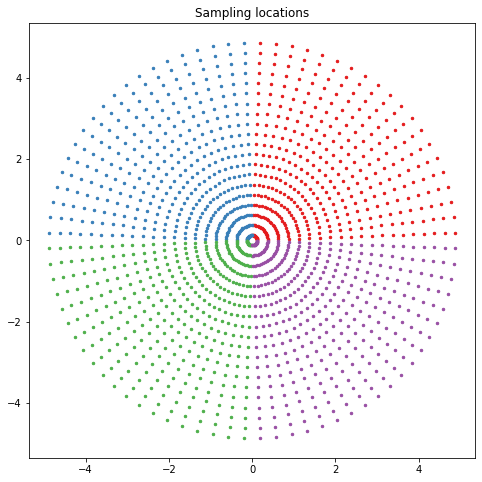

In [20]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Sampling locations")
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']

# subdiv = 3
radius_subdiv = 1
azimuth_subdiv = 4
subdiv = (radius_subdiv, azimuth_subdiv)
# subdiv = 3
n_radius = 20
n_azimuth = 20
img_size = (10,10)
radius_buffer, azimuth_buffer = get_optimal_buffers(subdiv, n_radius, n_azimuth, img_size)

params = get_sample_params_from_subdiv(
    subdiv=subdiv,
    img_size=img_size,
    n_radius=n_radius,
    n_azimuth=n_azimuth,
    radius_buffer=radius_buffer,
    azimuth_buffer=azimuth_buffer
)

x = []
y = []
s = []
out = torch.empty(len(params),1,  n_radius*n_azimuth,2)
for i in range(len(params)):
    sample_locations = get_sample_locations(**params[i])
    ax.scatter(*sample_locations, color=colors[i%len(colors)], s=6)
    x_ = torch.tensor(sample_locations[0]).reshape(1, 1, n_radius*n_azimuth).float()
    x = x_/10
    y_ = torch.tensor(sample_locations[1]).reshape(1, 1, n_radius*n_azimuth).float()
    y = y_/10
    t = torch.cat((-y, x))
    out[i] = t.transpose(0,1).transpose(1,2)
    s.append(sample_locations)
#     print(sample_locations)
plt.show()

In [24]:
out[3, :]

tensor([[[0.4871, 0.0191],
         [0.4841, 0.0573],
         [0.4781, 0.0951],
         [0.4692, 0.1323],
         [0.4574, 0.1687],
         [0.4427, 0.2041],
         [0.4253, 0.2382],
         [0.4053, 0.2708],
         [0.3828, 0.3018],
         [0.3580, 0.3309],
         [0.3309, 0.3580],
         [0.3018, 0.3828],
         [0.2708, 0.4053],
         [0.2382, 0.4253],
         [0.2041, 0.4427],
         [0.1687, 0.4574],
         [0.1323, 0.4692],
         [0.0951, 0.4781],
         [0.0573, 0.4841],
         [0.0191, 0.4871],
         [0.4621, 0.0182],
         [0.4593, 0.0544],
         [0.4536, 0.0902],
         [0.4451, 0.1255],
         [0.4339, 0.1601],
         [0.4200, 0.1936],
         [0.4035, 0.2260],
         [0.3846, 0.2570],
         [0.3632, 0.2863],
         [0.3396, 0.3139],
         [0.3139, 0.3396],
         [0.2863, 0.3632],
         [0.2570, 0.3846],
         [0.2260, 0.4035],
         [0.1936, 0.4200],
         [0.1601, 0.4339],
         [0.1255, 0.4451],
 

In [ ]:
d = torch.linspace(-1, 1, 8)

In [ ]:
meshx, meshy = torch.meshgrid((d, d))
grid = torch.stack((meshy, meshx), 2)
grid = grid.unsqueeze(0)

In [ ]:
grid.shape

In [ ]:
input

# Image


In [ ]:
im = t2pil(Image.open("../tiny-imagenet-200/train/n01443537/images/n01443537_0.JPEG")).reshape(1, 3, 64, 64)
im_ = t2pil(Image.open("../tiny-imagenet-200/train/n01443537/images/n01443537_1.JPEG")).reshape(1, 3, 64, 64)
inp = torch.cat((im, im_))
inp.shape

# Test

In [ ]:
im = torch.arange(100).reshape(1, 1, 10, 10).float()
im_ = torch.arange(100, 200).reshape(1, 1, 10, 10).float()
inp = torch.cat((im, im_))
inp.shape

In [ ]:
grid

In [ ]:
im

In [ ]:
t_ = nn.functional.grid_sample(im, grid, align_corners = True)

In [ ]:
t_

In [ ]:
im

In [ ]:
t_.transpose(1, 2).reshape(4, -1).shape

In [ ]:
inp[0][:, 61, 33]

In [ ]:

import numpy as np

sz = 5
input_arr = torch.from_numpy(np.arange(sz*sz).reshape(1,1,sz,sz)).float()
input_arr = input_arr//20
indices = torch.from_numpy(np.array([-1,-1, -0.5,-0.5, 0,0, 0.5,0.5, 1,1]).reshape(1, 1, 5, 2)).float()

out = nn.functional.grid_sample(input_arr, indices)
print(input_arr)
print(out)


In [ ]:
t = torch.arange(16).reshape(1, 3, 4, 4).float()
t_ = torch.arange(48, 96).reshape(1, 3, 4, 4).float()
inp = torch.cat((t, t_))


In [ ]:
tensor = inp[:, :, x[i*radius_subdiv:radius_subdiv + i*radius_subdiv], y[i*radius_subdiv:radius_subdiv + i*radius_subdiv]].permute(0,2,1,3).contiguous().view(-1, 64*3)

In [ ]:
t = torch.arange(8).reshape(1, 2,2,2)

In [ ]:
t = t.repeat(3, 1, 1, 1)

In [ ]:
t

In [ ]:
out = tensor.contiguous().view(2, 2, -1)
out.shape

In [ ]:
out

In [ ]:
x_[0,0:2,3]  = out

In [ ]:
out.shape

In [ ]:
x_ = torch.rand(2, 2*radius_subdiv, azimuth_subdiv//2, 60)

In [ ]:
for i in range(azimuth_subdiv):
    print(i, i*radius_subdiv)
    tensor = nn.functional.grid_sample(inp, out[i*radius_subdiv:radius_subdiv + i*radius_subdiv].reshape(1, radius_subdiv, 20,2).repeat(2, 1, 1,1), align_corners = False)
#     tensor = inp[:, :, x[i*radius_subdiv:radius_subdiv + i*radius_subdiv], y[i*radius_subdiv:radius_subdiv + i*radius_subdiv]] .permute(0,2,1,3).contiguous().view(-1, 64*3)
    tensor = tensor.permute(0,2,1,3).contiguous().view(-1, 20*3)
    o = tensor.contiguous().view(2, radius_subdiv, -1)
    if i < azimuth_subdiv//2:
        x_[:, 0:2, azimuth_subdiv//2-1-i, :] = o
    else:
        x_[:, 2:4, 0+i-azimuth_subdiv//2, :] = o
        
    
    


In [ ]:
x_.shape

In [ ]:
o = torch.arange(16)
x = torch.rand(2*radius_subdiv, azimuth_subdiv//2)
x.shape, o

In [ ]:
for i in range(azimuth_subdiv):
    if i < azimuth_subdiv//2:
        x[0:2, azimuth_subdiv//2-1-i] = o[i*2:2 + i*2]
    else:
        x[2:4, 0+i-azimuth_subdiv//2] = o[i*2:2 + i*2]
    
    


In [ ]:
x

In [ ]:
ind = torch.tensor(((0, 0, 1, 2), (1,1,2, 3)))
ind1 = torch.tensor(((1, 2, 3, 2), (1,1,2, 2)))

In [ ]:
inp[:, :, ind, ind1].shape

In [ ]:
q = inp[:, :, ind, ind1].permute(0,2, 1, 3 ).contiguous().view(-1, 12)

In [ ]:
q.shape

In [ ]:
q

In [ ]:
inp[:, :, ind, ind1].permute(0,2, 1, 3).flatten(2)

In [ ]:
q.contiguous().view(2, 2, -1)

In [ ]:
t = torch.ones(( 2, 4, 4, 12))

In [ ]:
t[:, :2, 0, :].shape

In [ ]:
t[:, 0, :2, :] =  q.contiguous().view(2, 2, -1)

In [ ]:
t[0][:, :, 0]